Algoritmo de agrupamiento K-means
===

Este es el problema inverso al de clasificación. En la siguiente figura se desea determinar cuántos grupos existen en un conjunto de datos y los centroides de dichos grupos, tal que los miembros de cada grupo tengan unas características similares. El centroide de cada grupo representa a los miembros de su grupo.  

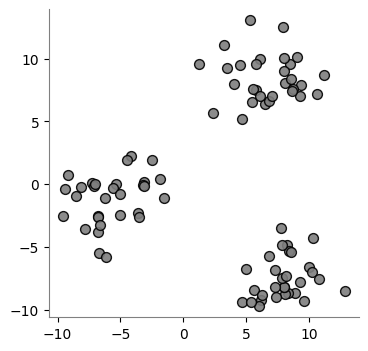

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=90,
    n_features=2,
    centers=[
        [8, -8],
        [7, 8],
        [-6, -1],
    ],
    cluster_std=2.0,
    shuffle=False,
    random_state=5,
)

plt.figure(figsize=(4, 4))

plt.scatter(
    X[:, 0],
    X[:, 1],
    color="tab:gray",
    edgecolors="k",
    s=50,
    alpha=0.9,
)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axis("equal")
plt.show()

En el algoritmo K-means, se pretende minimizar la distancia entre los miembros de cada grupo y maximizar la distancia entre grupos, también conocido como principio de inercia.  Para ello, en este algoritmo se minimiza:

$$ \sum_{i=1}^k \sum_{\mathbf{x}_j \in S_i} \text{dist}( \mathbf{x}_j, \mathbf{u}_i)$$


Si se usa la norma euclidiana:

$$
\text{dist}( \mathbf{x}_j, \mathbf{u}_i) = \| \mathbf{x}_j - \mathbf{u}_i \|^2 = \sum_{p=1}^P (x_{jp} - u_{ip})^2
$$

La inercia es reconocida como una medida de la coherencia interna de los patrones que representan cada cluster o grupo.

Se sabe que esta métrica sufre varios problemas:

* Asume que los clusters son convexos e isotropicos, por lo que tiene una efectividad limitada para clusters elogados o con formas irregulares.

* La inercia es un valor no normalizado, por que se sabe que los valores bajos son mejores y que un valor de cero es óptimo.

* Las distancias euclidianas en altas dimensiones tienden a ser infladas, por lo que las técnicas para reducir la dimensionalidad son consideradas para el preprocesamiento de los datos.

Este proceso se realiza en dos fases:

* Paso 1: Se generan los centros iniciales $\mathbf{u}_i$. Podrían ser aleatorios o seleccionados entre los datos.

In [2]:
#
# Se generan tres centros elatorios iniciales
#
import numpy as np

centers = np.array(
    [
        [-5, 7],
        [0, -8],
        [13, 0],
    ],
    dtype=np.float64,
)

* Paso 2: Dados los centros de los clusters $\mathbf{u}_i$, se calcula la distancia de cada uno de los puntos del dataset a los centros de los clusters.

In [3]:
from sklearn.metrics.pairwise import euclidean_distances

distances = euclidean_distances(X, centers)
distances[:5, :]

array([[20.92875212,  8.9070706 ,  9.59061636],
       [23.65194338, 12.87142082,  8.50531131],
       [17.74305182,  8.80752849,  6.79951841],
       [19.67041089,  6.29376779, 11.4378307 ],
       [20.59426138,  8.4011511 ,  9.81732198]])

* Paso 3: Se asigna cada punto del dataset al cluster más cercano.

In [4]:
labels = np.argmin(distances, axis=1)
labels

array([1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1])

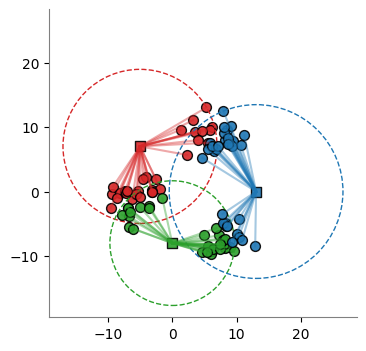

In [5]:
from matplotlib.patches import Circle


def plot_clusters(X, centers, labels):

    colors = ["tab:red", "tab:green", "tab:blue"]

    plt.figure(figsize=(4, 4))

    for cluster in np.unique(labels):

        X_cluster = X[labels == cluster, :]

        plt.scatter(
            X_cluster[:, 0],
            X_cluster[:, 1],
            color=colors[cluster],
            edgecolors="k",
            s=50,
            alpha=0.9,
        )

        for i in range(X_cluster.shape[0]):
            plt.plot(
                [centers[cluster, 0], X_cluster[i, 0]],
                [centers[cluster, 1], X_cluster[i, 1]],
                color=colors[cluster],
                alpha=0.4,
            )

        plt.scatter(
            centers[cluster, 0],
            centers[cluster, 1],
            marker="s",
            color=colors[cluster],
            edgecolors="k",
            s=50,
            alpha=0.9,
        )

        distances = euclidean_distances(
            X_cluster, np.expand_dims(centers[cluster, :], axis=0)
        ).reshape(-1)
        
        radius = distances.max()
        
        plt.gca().add_patch(
            Circle(
                xy=centers[cluster, :],
                radius=radius,
                fill=False,
                ec=colors[cluster],
                ls="--",
            )
        )

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.axis("square")
    plt.show()


plot_clusters(X, centers, labels)

* Paso 4: Se recalcula cada centro $\mathbf{u}_i$ como el promedio de los puntos $\mathbf{x}_j$ que pertenecen a él; es decir, la componente $u_{ip}$ del centroide $i$ es el promedio de las componentes $x_{jp}$. 

In [6]:
def compute_centers(X, centers, labels):

    for cluster in np.unique(labels):
        centers[cluster, :] = np.mean(
            X[labels == cluster, :],
            axis=0,
        )
    return centers

centers = compute_centers(X, centers, labels)
centers

array([[-2.38591678,  3.2492107 ],
       [ 2.45751494, -6.44235461],
       [ 8.47942768,  3.03165143]])

El algoritmo se detiene cuando ningún punto cambia de cluster.

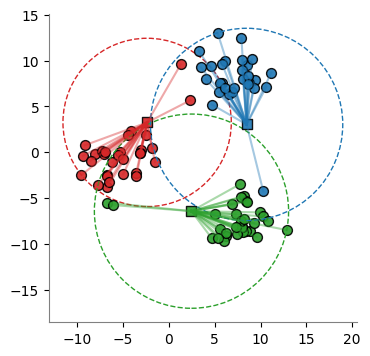

array([[-5.19206228, -0.26197605],
       [ 6.97409343, -7.43261021],
       [ 7.13658938,  8.0416505 ]])

In [7]:
#
# Iteración #2
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

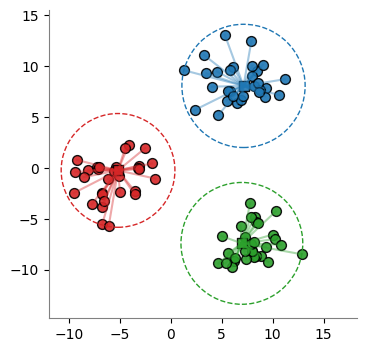

array([[-5.7408924 , -1.1458363 ],
       [ 7.97850671, -7.44748742],
       [ 6.67558968,  8.42457928]])

In [8]:
#
# Iteración #3
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

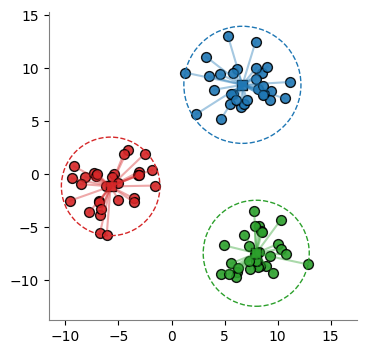

array([[-5.7408924 , -1.1458363 ],
       [ 7.97850671, -7.44748742],
       [ 6.67558968,  8.42457928]])

In [9]:
#
# Iteración #4
#
distances = euclidean_distances(X, centers)
labels = np.argmin(distances, axis=1)
plot_clusters(X, centers, labels)
centers = compute_centers(X, centers, labels)
centers

## Agrupamiento usando KMeans en Python

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    # -------------------------------------------------------------------------
    # Numero de clusters
    n_clusters=3,
    # -------------------------------------------------------------------------
    # Algoritmo para inicializar los clusters:
    # 'k-means++': Selecciona los puntos iniciales entre los datos del dataset
    # 'random': aleatorio
    init="k-means++",
    # -------------------------------------------------------------------------
    #
    n_init=10,
    # -------------------------------------------------------------------------
    #
    max_iter=300,
    # -------------------------------------------------------------------------
    #
    random_state=None,
    # -------------------------------------------------------------------------
    # 'full': algoritmo clásico,
    # 'elkan': variación con eficiencia computacional que evita computar las
    # distancias entre todos los puntos.
    algorithm="lloyd",
)


kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [11]:
#
# Centros de los clusters
#
kmeans.cluster_centers_

array([[-5.7408924 , -1.1458363 ],
       [ 7.97850671, -7.44748742],
       [ 6.67558968,  8.42457928]])

In [12]:
#
# Cluster asignado a cada punto
#
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [13]:
#
# Sum of squared distances of samples to their closest cluster center, weighted
# by the sample weights if provided.
#
kmeans.inertia_

715.9389324313938

In [14]:
kmeans.n_iter_

2